In [1]:
import polars as pl
import dsds.compare as comp

In [2]:
# This is the same dataset as used in 
# the demo by Microsoft: https://learn.microsoft.com/en-us/fabric/data-science/semantic-link-validate-data
# However, dsds will be an open source package based on Polars, not
# FabricDataFrame, which is a Microsoft product.

df = pl.read_csv("../data/providers.csv")
df.head()

Id,ORGANIZATION,NAME,GENDER,SPECIALITY,ADDRESS,CITY,STATE,ZIP,LAT,LON,UTILIZATION
str,str,str,str,str,str,str,str,str,f64,f64,i64
"""3421aa75-dec7-…","""ef58ea08-d883-…","""Tomas436 Sauer…","""M""","""GENERAL PRACTI…","""60 HOSPITAL RO…","""LEOMINSTER""","""MA""","""01453""",42.520838,-71.770876,1557
"""c9b3c857-2e24-…","""69176529-fd1f-…","""Suzette512 Mon…","""F""","""GENERAL PRACTI…","""330 MOUNT AUBU…","""CAMBRIDGE""","""MA""","""02138""",42.375967,-71.118275,2296
"""0359f968-d1a6-…","""5e765f2b-e908-…","""Gaynell126 Str…","""F""","""GENERAL PRACTI…","""211 PARK STREE…","""ATTLEBORO""","""MA""","""02703""",41.931653,-71.294503,2287
"""446d1609-858f-…","""f1fbcbfb-fcfa-…","""Patricia625 Sa…","""F""","""GENERAL PRACTI…","""ONE GENERAL ST…","""LAWRENCE""","""MA""","""01842""",42.700273,-71.161357,1327
"""e6283e46-fd81-…","""e002090d-4e92-…","""Jeanmarie510 B…","""F""","""GENERAL PRACTI…","""1493 CAMBRIDGE…","""CAMBRIDGE""","""MA""","""02138""",42.375967,-71.118275,3199


In [3]:
cols = ["Id", "ORGANIZATION", "NAME", "GENDER", "ADDRESS", "CITY", "SPECIALITY", "STATE", "ZIP", "UTILIZATION", "LON", "LAT"] # "LAT", "LON"]
entropy, tree = comp.dependency_detection(df, cols=cols, threshold=0.015)

INFO:dsds.compare:The following columns are not considered because they are constants: ['STATE']


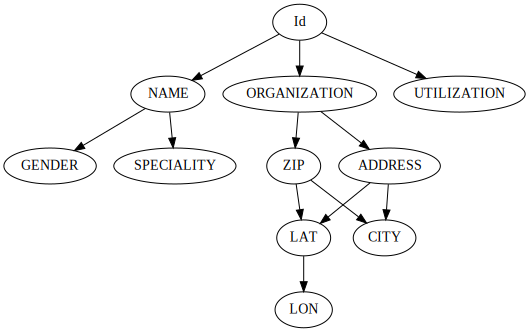

In [4]:
tree 

In [5]:
violations = comp.dependency_violation(df, entropy, threshold=0.05)

In [8]:
with pl.Config(fmt_str_lengths=50):
    for v in violations:
        print(v)

shape: (3, 4)
┌────────────────────┬───────┬───────────────────────────┬──────────────────────────────────┐
│ Column Name: NAME  ┆ count ┆ Col GENDER: Value & Count ┆ Reason                           │
│ ---                ┆ ---   ┆ ---                       ┆ ---                              │
│ str                ┆ u32   ┆ list[struct[2]]           ┆ str                              │
╞════════════════════╪═══════╪═══════════════════════════╪══════════════════════════════════╡
│ Dorian295 Lind531  ┆ 2     ┆ [{"F",1}, {"M",1}]        ┆ `NAME` should uniquely determine │
│                    ┆       ┆                           ┆ `GENDER`                         │
│ Drew592 Cassin499  ┆ 2     ┆ [{"M",1}, {"F",1}]        ┆ `NAME` should uniquely determine │
│                    ┆       ┆                           ┆ `GENDER`                         │
│ Joe656 Connelly992 ┆ 2     ┆ [{"M",1}, {"F",1}]        ┆ `NAME` should uniquely determine │
│                    ┆       ┆                